# Часть 4. Анализ отзывов

Цель анализа опровергнуть первоначальные гипотезы (опасения заказчиков), что:

Вода - всегда плохо

Сыпучее покрытие = грязь

Оборудование опасно для использования

In [1]:
import matplotlib.pyplot as pltax 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

from nltk.tokenize import word_tokenize, sent_tokenize 
from nltk.corpus import stopwords
import plotly.express as px

In [3]:
from wordcloud import WordCloud
from nltk.util import ngrams
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
#увеличиваю отображение таблиц в ячейках вывода, чтобы показывало все данные
#pd.options.display.max_rows = 30000
#pd.options.display.max_columns = 100

In [4]:
#whitegrid,darkgrid,white,ticks,white
sns.set_theme(style="whitegrid")
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
plt.rcParams["figure.figsize"] = (10,5)

In [59]:
from IPython.display import Image

In [6]:
df= pd.read_csv('2023.02.09_reviews_playgrounds_final.csv')
df

,name,gender,comment,rating,date,location,resource,lemmatized
0,Дмитрий,male,"Главное, ребёнку нравится. Но летом народу оче...",0,2022,Парк Горького. Салют,google,главное реб нку нравиться но лето народ очень ...
1,Михаил Лось,male,Здесь очень весело!),0,2022,Парк Горького. Салют,google,очень весело
2,Vika Andreeva,female,Очень классное место.Очень весело.Особенно пон...,0,2021,Парк Горького. Салют,google,очень классный место очень весело особенно пон...
3,Светлана Рабинович,female,"Замечательный комплекс площадок, много качелей...",0,2021,Парк Горького. Салют,google,замечательный комплекс площадка много качели л...
4,Денис Пупыкин,male,Отличное место для игр с детьми))),0,2021,Парк Горького. Салют,google,отличный место игра ребёнок
...,...,...,...,...,...,...,...,...
1229,Рафаэль Т.,male,Интересная площадка для детей,0,2020,Бунинские луга. Пирамиды,yandex,интересный площадка ребёнок
1230,Татьяна Б,female,Очень хорошая площадка! Нам очень нравится. Го...,0,2020,Бунинские луга. Пирамиды,yandex,очень хороший площадка мы очень нравиться горк...
1231,Ольга Кузнецова,female,Мой ребенок готов сюда эмигрировать.,0,2020,Бунинские луга. Пирамиды,yandex,ребёнок готовый сюда эмигрировать
1232,Иван,male,Шикарная площадка с водой. Дети часами могут п...,0,2020,Бунинские луга. Пирамиды,yandex,шикарный площадка вода ребёнок часами мочь пус...


In [7]:
def remove_punctuations_numbers(inputs):
    return re.sub(r'[^а-яА-Я]', ' ', str(inputs))

In [8]:
def tokenization(inputs):  
    return word_tokenize(inputs)

In [9]:

stop_words = set(stopwords.words("russian"))
rem_w = ['без', 'нет', 'хорошо', 'больше', 'конечно', 'лучше', 'много', 'нельзя', 'никогда', 'после', \
        'было', 'только', 'не']
for i in rem_w:
    stop_words.remove(i)

def stopwords_remove(inputs): 
    return [k for k in inputs if k not in stop_words]

In [10]:
def morth_lem(a):
    return [ morph.parse(m)[0].normal_form for m in a]

In [11]:
def remove_less3(inputs): 
    return [k for k in inputs if (len(k) >3 or k in rem_w)]

In [17]:
def remove_less3_lem(inputs): 
    return [k for k in inputs if len(k) >3]

In [12]:
df['lemmatized'] = df['comment'].apply(remove_punctuations_numbers).apply(tokenization).apply(stopwords_remove).apply(morth_lem)

In [13]:
df['lemmatized_clean'] =df['lemmatized'].apply(remove_less3)
df

,name,gender,comment,rating,date,location,resource,lemmatized,lemmatized_clean
0,Дмитрий,male,"Главное, ребёнку нравится. Но летом народу оче...",0,2022,Парк Горького. Салют,google,"[главное, реб, нку, нравиться, но, лето, народ...","[главное, нравиться, лето, народ, очень, много]"
1,Михаил Лось,male,Здесь очень весело!),0,2022,Парк Горького. Салют,google,"[здесь, очень, весело]","[здесь, очень, весело]"
2,Vika Andreeva,female,Очень классное место.Очень весело.Особенно пон...,0,2021,Парк Горького. Салют,google,"[очень, классный, место, очень, весело, особен...","[очень, классный, место, очень, весело, особен..."
3,Светлана Рабинович,female,"Замечательный комплекс площадок, много качелей...",0,2021,Парк Горького. Салют,google,"[замечательный, комплекс, площадка, много, кач...","[замечательный, комплекс, площадка, много, кач..."
4,Денис Пупыкин,male,Отличное место для игр с детьми))),0,2021,Парк Горького. Салют,google,"[отличный, место, игра, ребёнок]","[отличный, место, игра, ребёнок]"
...,...,...,...,...,...,...,...,...,...
1229,Рафаэль Т.,male,Интересная площадка для детей,0,2020,Бунинские луга. Пирамиды,yandex,"[интересный, площадка, ребёнок]","[интересный, площадка, ребёнок]"
1230,Татьяна Б,female,Очень хорошая площадка! Нам очень нравится. Го...,0,2020,Бунинские луга. Пирамиды,yandex,"[очень, хороший, площадка, мы, очень, нравитьс...","[очень, хороший, площадка, очень, нравиться, г..."
1231,Ольга Кузнецова,female,Мой ребенок готов сюда эмигрировать.,0,2020,Бунинские луга. Пирамиды,yandex,"[мой, ребёнок, готовый, сюда, эмигрировать]","[ребёнок, готовый, сюда, эмигрировать]"
1232,Иван,male,Шикарная площадка с водой. Дети часами могут п...,0,2020,Бунинские луга. Пирамиды,yandex,"[шикарный, площадка, вода, ребёнок, часами, мо...","[шикарный, площадка, вода, ребёнок, часами, мо..."


In [18]:
df['lemmatized'] =df['lemmatized'].apply(remove_less3_lem)
df

,name,gender,comment,rating,date,location,resource,lemmatized,lemmatized_clean
0,Дмитрий,male,"Главное, ребёнку нравится. Но летом народу оче...",0,2022,Парк Горького. Салют,google,"[главное, нравиться, лето, народ, очень, много]",главное нравиться лето народ очень много
1,Михаил Лось,male,Здесь очень весело!),0,2022,Парк Горького. Салют,google,"[здесь, очень, весело]",здесь очень весело
2,Vika Andreeva,female,Очень классное место.Очень весело.Особенно пон...,0,2021,Парк Горького. Салют,google,"[очень, классный, место, очень, весело, особен...",очень классный очень весело особенно понравить...
3,Светлана Рабинович,female,"Замечательный комплекс площадок, много качелей...",0,2021,Парк Горького. Салют,google,"[замечательный, комплекс, площадка, много, кач...",замечательный комплекс много качели любой вкус...
4,Денис Пупыкин,male,Отличное место для игр с детьми))),0,2021,Парк Горького. Салют,google,"[отличный, место, игра, ребёнок]",отличный игра
...,...,...,...,...,...,...,...,...,...
1229,Рафаэль Т.,male,Интересная площадка для детей,0,2020,Бунинские луга. Пирамиды,yandex,"[интересный, площадка, ребёнок]",интересный
1230,Татьяна Б,female,Очень хорошая площадка! Нам очень нравится. Го...,0,2020,Бунинские луга. Пирамиды,yandex,"[очень, хороший, площадка, очень, нравиться, г...",очень хороший очень нравиться горка мельница и...
1231,Ольга Кузнецова,female,Мой ребенок готов сюда эмигрировать.,0,2020,Бунинские луга. Пирамиды,yandex,"[ребёнок, готовый, сюда, эмигрировать]",готовый эмигрировать
1232,Иван,male,Шикарная площадка с водой. Дети часами могут п...,0,2020,Бунинские луга. Пирамиды,yandex,"[шикарный, площадка, вода, ребёнок, часами, мо...",шикарный вода часами мочь пускать кораблик есл...


### Удалю самые популярные слова, не отображающие настроение

In [14]:
popular_words = ['ребёнок', 'площадка', 'детский', 'место','парк', 'москва', 'быть', 'туда', 'сюда', 'себя', 'парка', 'салют',\
                 'весь', 'который', 'только', 'есть', 'такой', 'горький']
def popular_remove(inputs): 
    return [k for k in inputs if k not in popular_words]

In [15]:
df['lemmatized_clean'] =df['lemmatized_clean'].apply(popular_remove)

In [19]:
df['lemmatized'] = df['lemmatized'].apply(popular_remove)

In [16]:
df['lemmatized_clean'] = df['lemmatized_clean'].str.join(' ')

In [20]:
df['lemmatized'] = df['lemmatized'].str.join(' ')


## Облако всех слов в отзывах
размер слов зависит от частоты встречаемости в данных, чем больше - тем чаще используется  

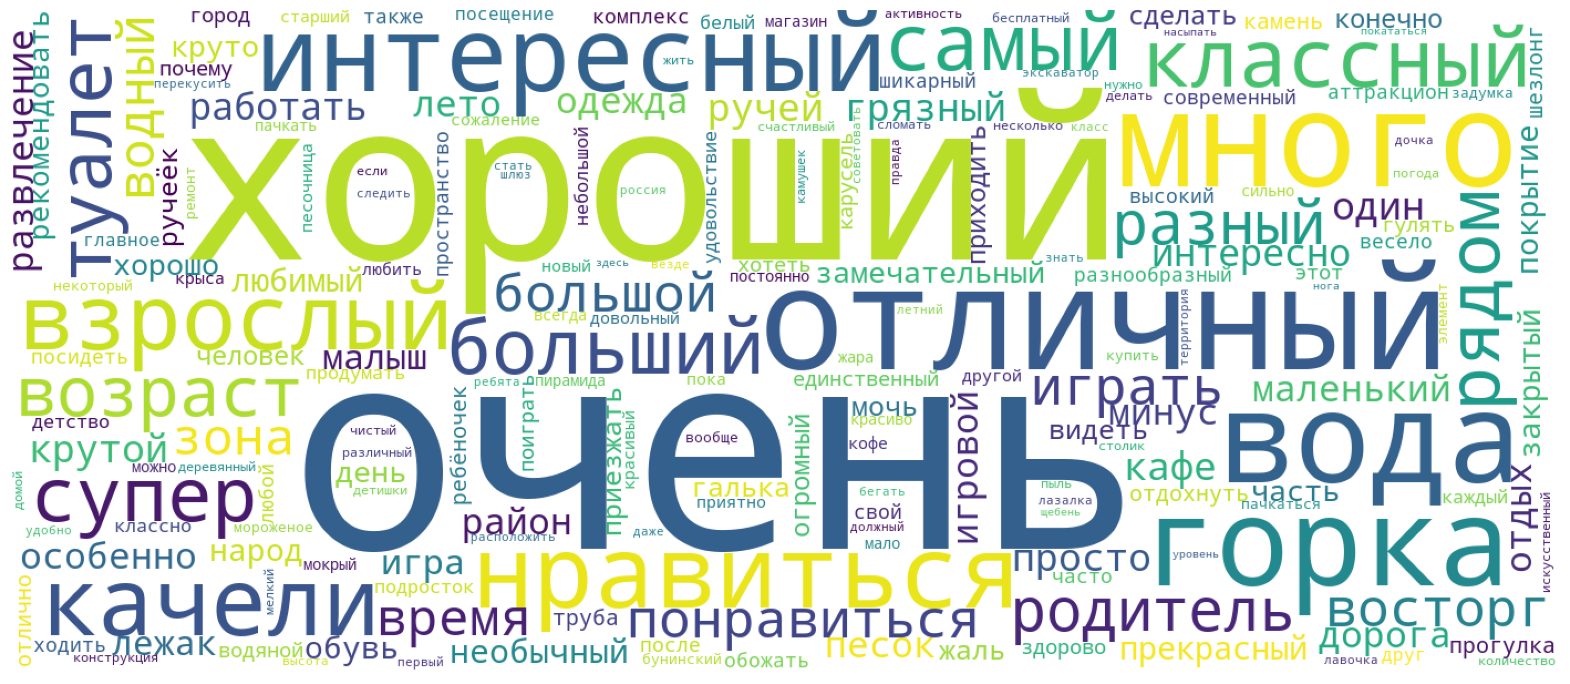

In [21]:
comment_words = ''
for val in df.lemmatized:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
wordcloud = WordCloud(width = 1400, height = 600,
                background_color ='white', collocations=False, random_state=0,
                min_font_size = 10).generate(comment_words)
plt.figure( figsize=(20,10))
plt.axis('off')
plt.imshow(wordcloud)

In [43]:
wordcloud.to_file("all_review.png")

## Облако позитивных слов в отзывах

In [124]:
dfNegReviews = df[df["rating"] == 2]
dfPosReviews = df[df["rating"] == 0]

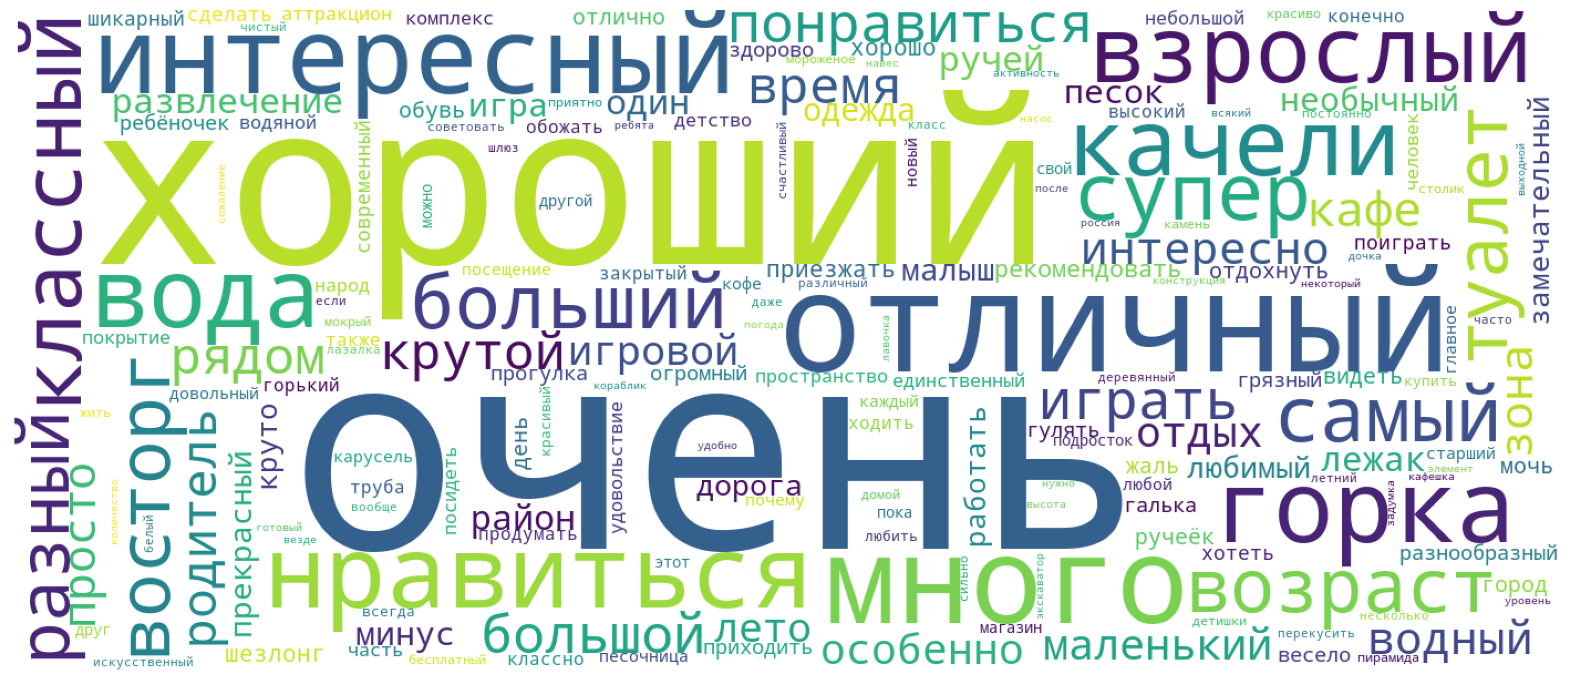

In [45]:
poz_comment_words = ''
for val3 in dfPosReviews.lemmatized:
     
    # typecaste each val to string
    val3 = str(val3)
 
    # split the value
    tokens3 = val3.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens3)):
        tokens3[i] = tokens3[i].lower()
     
    poz_comment_words += " ".join(tokens3)+" "
wordcloud3 = WordCloud(width = 1400, height = 600,
                background_color ='white', collocations=False, random_state=0,
                min_font_size = 10).generate(poz_comment_words)
plt.figure( figsize=(20,10))
plt.axis('off')
plt.imshow(wordcloud3)

In [46]:
wordcloud3.to_file("poz_review.png")

## Облако негативных слов в отзывах

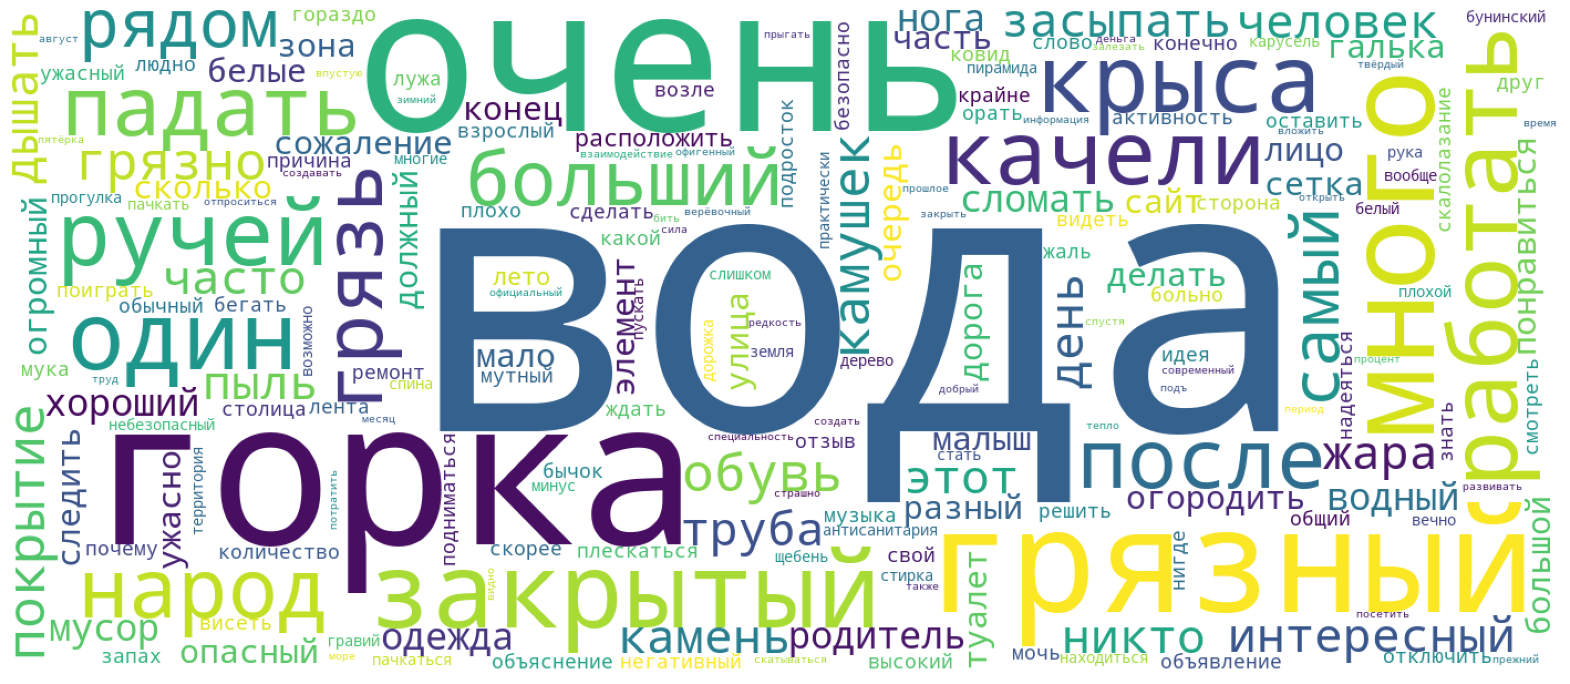

In [47]:
neg_comment_words = ''
for val2 in dfNegReviews.lemmatized:
     
    # typecaste each val to string
    val2 = str(val2)
 
    # split the value
    tokens2 = val2.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens2)):
        tokens2[i] = tokens2[i].lower()
     
    neg_comment_words += " ".join(tokens2)+" "
wordcloud2 = WordCloud(width = 1400, height = 600,
                background_color ='white', collocations=False, random_state=2,
                min_font_size = 10).generate(neg_comment_words)
plt.figure( figsize=(20,10))
plt.axis('off')
plt.imshow(wordcloud2)

In [48]:
wordcloud2.to_file("neg_review.png")

## Посмотрю подробнее на количество и значимость слов и словосочетаний

In [33]:
def generateNgrams(documents, size):
    '''
    Input: 
    documents: dataframe having only reviews stacked
    size: size of ngram(as 1,2,3..)
    
    Output:
    dataframe:{columns = {'words','count'}}
    '''
    
    
    ngrams_all = []
    
    for document in documents:  # the document is not splitted already
         
        document = document.split()
        
        if len(document) < size:
            continue
        else:
            output = list(ngrams(document, size)) # using NLTK's ngrams function
            
        for ngram in output:
            ngrams_all.append(" ".join(ngram))
            
    count_ngram = Counter()
    
    for word in ngrams_all:  # making word frequency dictionary
        count_ngram[word] += 1
        
    
    # converting from dictionary to dataframe data structure
    
    df = pd.DataFrame.from_dict(count_ngram, orient='index').reset_index()
    
    df = df.rename(columns={'index':'words', 0:'count'})
    
    df = df.sort_values(by='count', ascending=False) # highest freq words on the top
    
    df = df.head(25) # taking 20 most frequent n-grams
    
    df = df.sort_values(by='count')
    
    
    return df

In [44]:
def plot_poz_Ngrams(documents):
    
    '''
    documents : dataframe attribute having reviews text or lists of reviews
    '''
    
    unigrams = generateNgrams(documents, 1)
    bigrams = generateNgrams(documents, 2)
    trigrams = generateNgrams(documents, 3)
    
    # Set plot figure size
    fig = plt.figure(figsize = (20, 7))
    plt.subplots_adjust(wspace=.5)
    
    # plot 1
    ax = fig.add_subplot(131)
    ax.barh(np.arange(len(unigrams['words'])), unigrams['count'], align='center', alpha=1, color = "#8EC5CB")
    ax.set_title('Unigrams')
    plt.yticks(np.arange(len(unigrams['words'])), unigrams['words'])
    plt.xlabel('Count')
    
    # plot 2
    ax2 = fig.add_subplot(132)
    ax2.barh(np.arange(len(bigrams['words'])), bigrams['count'], align='center', alpha=1, color = "#8EC5CB")
    ax2.set_title('Bigrams')
    plt.yticks(np.arange(len(bigrams['words'])), bigrams['words'])
    plt.xlabel('Count')
    
        

    plt.show()

In [48]:
def plot_neg_Ngrams(documents):
    
    '''
    documents : dataframe attribute having reviews text or lists of reviews
    '''
    
    unigrams = generateNgrams(documents, 1)
    bigrams = generateNgrams(documents, 2)
    trigrams = generateNgrams(documents, 3)
    
    # Set plot figure size
    fig = plt.figure(figsize = (20, 7))
    plt.subplots_adjust(wspace=.5)
    
    # plot 1
    ax = fig.add_subplot(131)
    ax.barh(np.arange(len(unigrams['words'])), unigrams['count'], align='center', alpha=1, color = "#915660")
    ax.set_title('Unigrams')
    plt.yticks(np.arange(len(unigrams['words'])), unigrams['words'])
    plt.xlabel('Count')
    
    # plot 2
    ax2 = fig.add_subplot(132)
    ax2.barh(np.arange(len(bigrams['words'])), bigrams['count'], align='center', alpha=1, color = "#915660")
    ax2.set_title('Bigrams')
    plt.yticks(np.arange(len(bigrams['words'])), bigrams['words'])
    plt.xlabel('Count')
    
        

    plt.show()

### В позитивных отзывах

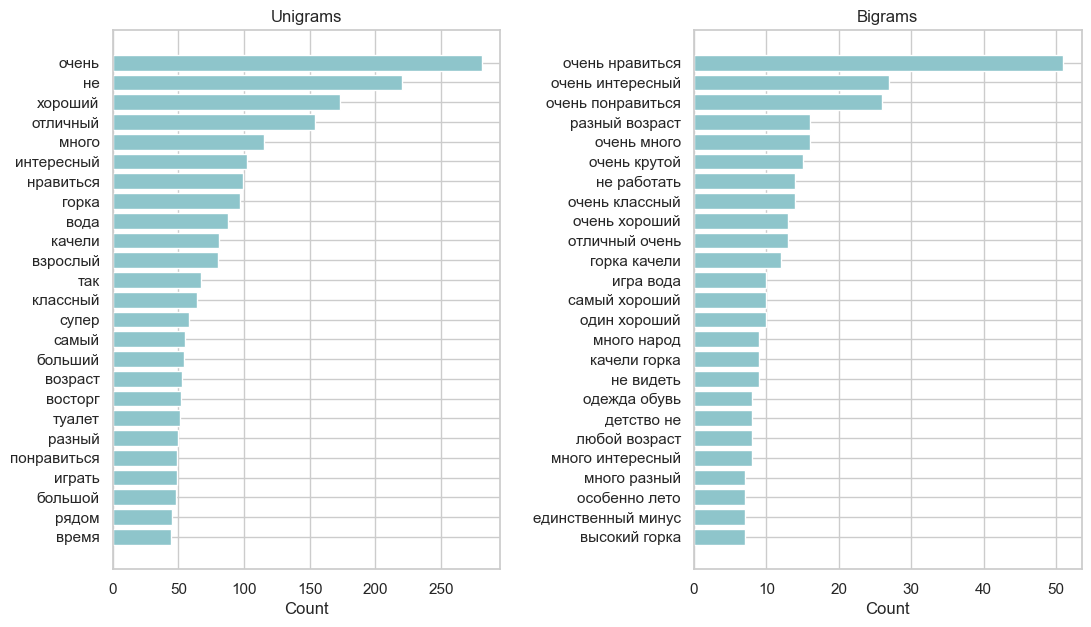

In [106]:
plot_poz_Ngrams(dfPosReviews['lemmatized_clean'])

### В негативных отзывах

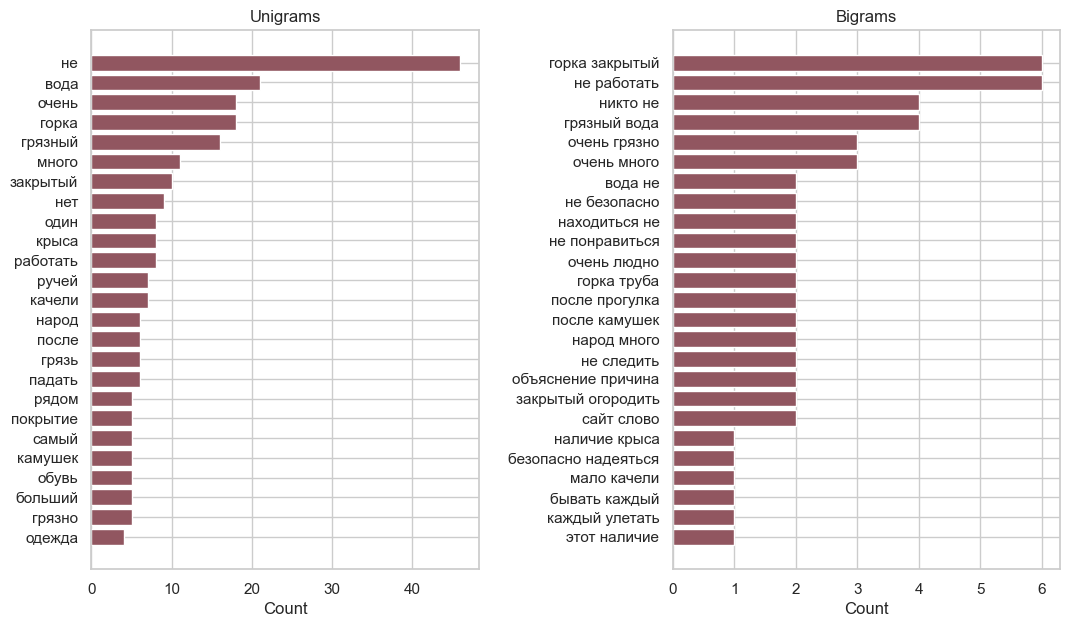

In [125]:
plot_neg_Ngrams(dfNegReviews['lemmatized_clean'])

### Уже можно выявить, что в какой степени влияет на характер отзыва

### Латентное размещение Дирихле (LDA)
Позволяет выделить наиболее вероятные темы отзывов

Одной из моделей, позволяющих объединить имеющиеся данные в группы на основании их сходства, является Латентное размещение Дирихле (LDA, от англ. Latent Dirichlet allocation). Это не единственный способ кластеризовать данные, но он хорошо работает в обработке текстов.


Смысл заключается в том, что мы рассматриваем каждый отзыв как смесь из некого количества тем. При этом появление какого-либо слова в отзыве вызвано принадлежностью этого отзыва определенной теме. С точки зрения алгоритма понятие темы это не то же самое, что тема для человека. Алгоритм оценивает вероятность появления группы слов вместе (принадлежности группы слов к той или иной теме). Количество тем мы должны указать алгоритму.


Тексты отзывов снова переводим в формат большой таблицы (мешок слов), передаем её методу LatentDirichletAllocation (реализует алгоритм LDA в библиотеке Scikit-Learn), и просим выделить 10 тем. Количество n-грамм ограничиваем



In [22]:
tokens = [word for word in comment_words.split()]

In [23]:
from gensim import corpora, models

dictionary = corpora.Dictionary([tokens])
corpus = [dictionary.doc2bow([token]) for token in tokens]

In [24]:
corpus[0]

[(355, 1)]

In [41]:
from gensim.models import LdaModel
lda_model = LdaModel(corpus, num_topics=4, id2word = dictionary, random_state=100, \
                    passes=50, alpha='auto', per_word_topics=False, update_every=0)
#passes ( int , необязательный ) — количество проходов по корпусу во время обучения.
#update_every ( int , необязательный ) — количество документов, которые необходимо перебирать для каждого обновления. 
#Установите 0 для пакетного обучения, > 1 для интерактивного итеративного обучения.
#minimum_probability ( float , необязательный ) — Темы с вероятностью ниже этого порога будут отфильтрованы.

In [42]:
lda_model.print_topics( num_words=8)

[(0,
  '0.028*"много" + 0.026*"вода" + 0.024*"горка" + 0.017*"взрослый" + 0.012*"больший" + 0.012*"туалет" + 0.011*"рядом" + 0.010*"играть"'),
 (1,
  '0.034*"качели" + 0.027*"нравиться" + 0.022*"супер" + 0.021*"возраст" + 0.021*"родитель" + 0.020*"разный" + 0.020*"понравиться" + 0.017*"крутой"'),
 (2,
  '0.088*"очень" + 0.051*"хороший" + 0.044*"отличный" + 0.031*"интересный" + 0.017*"самый" + 0.014*"восторг" + 0.014*"большой" + 0.009*"минус"'),
 (3,
  '0.042*"классный" + 0.029*"время" + 0.029*"водный" + 0.017*"покрытие" + 0.016*"круто" + 0.012*"этот" + 0.012*"карусель" + 0.011*"современный"')]

 Сортируем все признаки по вероятности принадлежности к каждой из 10 тем и выводим на печать:

In [27]:
vect = CountVectorizer(max_features = 5000)
termFrequency = vect.fit_transform(tokens)
featureNames = vect.get_feature_names()

C:\Users\keybi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [58]:
vect

CountVectorizer(max_features=5000)

In [25]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=5)
lda.fit(termFrequency)
for idx, topic in enumerate(lda.components_):
    print ("Topic ", idx, " ".join(featureNames[i] for i in topic.argsort()[:-10 - 1:-1]))

Topic  0 нравиться супер рядом возраст кафе особенно одежда район необычный любимый
Topic  1 отличный качели больший туалет водный один дорога игровой круто часть
Topic  2 очень родитель понравиться время зона крутой ручей работать лежак покрытие
Topic  3 классный самый восторг большой играть грязный интересно маленький лето отдых
Topic  4 хороший много вода горка интересный взрослый разный просто развлечение песок


In [40]:
from gensim.models.coherencemodel import CoherenceModel
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # мера того, насколько хороша модель. чем ниже, тем лучше
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=df['lemmatized'].str.split(' ').tolist(), dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence() # мера того, насколько хороша модель. чем выше, тем лучше
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.033577397502308

Coherence Score:  0.63804933956415


In [43]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

C:\Users\keybi\AppData\Roaming\Python\Python39\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.212652  0.154920       1        1  43.760745
2     -0.246013  0.102708       2        1  29.175336
1      0.032283 -0.237105       3        1  18.674098
3      0.001078 -0.020522       4        1   8.389821, topic_info=            Term        Freq       Total Category  logprob  loglift
1447       очень  263.000000  263.000000  Default  30.0000  30.0000
2524     хороший  153.000000  153.000000  Default  29.0000  29.0000
1412    отличный  132.000000  132.000000  Default  28.0000  28.0000
725   интересный   92.000000   92.000000  Default  27.0000  27.0000
791       качели   66.000000   66.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
1875  просторный    2.804853    3.447196   Topic4  -5.7185   2.2719
2021     реклама    2.804814    3.447214   Topic4  -5.7185   2.2719
131       быстро    2.804808    3.447221   Topic4  -5.7185   2.2719
170       весело    6.752922   12.503154   Topic4  -4.8399   1.8621
1145    например    3.329966    5.796162   Topic4  -5.5469   1.9239

[163 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
17        3  0.919195  активность
72        2  0.946388       белый
99        1  0.987087     больший
100       1  0.023714     большой
100       2  0.972284     большой
...     ...       ...         ...
2552      2  0.962932       часто
2554      3  0.955689       часть
2570      4  0.883354       чисто
2571      3  0.919090      чистый
2626      4  0.910202        этот

[151 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2, 4])

In [58]:
pyLDAvis.save_html(vis, 'lda.html')

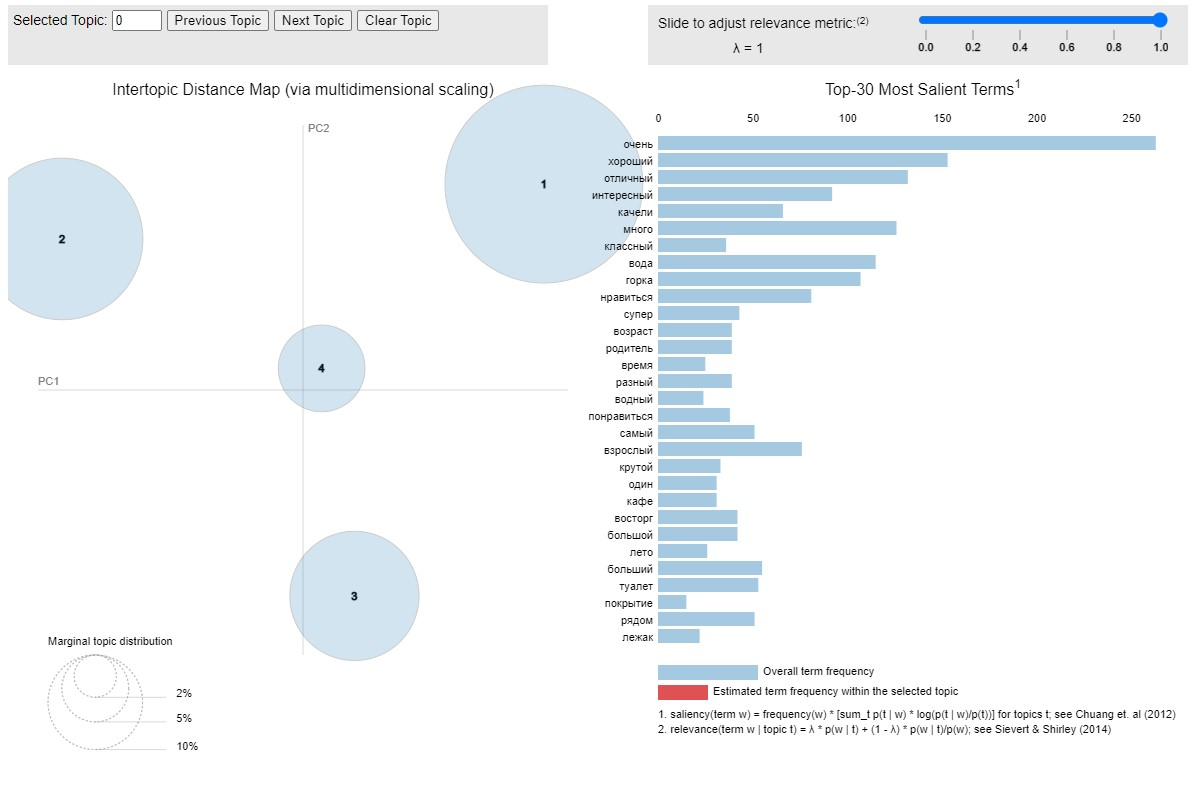

In [60]:
Image('lda.jpg')

Каждый кружок на левом графике представляет собой тему. Чем больше пузырь, тем более распространена эта тема.

Хорошая тематическая модель будет иметь довольно большие неперекрывающиеся кружки, разбросанные по всей диаграмме, а не сгруппированные в одном квадранте.

Модель со слишком большим количеством тем, как правило, будет иметь много перекрытий, пузырьков небольшого размера, сгруппированных в одной области диаграммы.

Хорошо, если вы наведете курсор на один из пузырьков, слова и полосы справа обновятся. Эти слова являются важными ключевыми словами, которые формируют выбранную тему.

Здесь действительно важно помнить, что «темы», идентифицируемые алгоритмом LDA, являются абстрактными , и сам алгоритм не знает фактического значения любого из вышеперечисленных терминов

### Разделю датасет на интересующие темы

#### Вода

In [44]:
df_water1 = df[df["lemmatized"].str.contains('вода', regex=False)].reset_index(drop = True)
df_water1

,name,gender,comment,rating,date,location,resource,lemmatized,lemmatized_clean
0,Paul Bailey,female,Невероятная бесплатная игровая площадка для в...,0,2021,Парк Горького. Салют,google,невероятный бесплатный игровой малыш сожаление...,невероятный бесплатный игровой малыш сожаление...
1,Vitaly Tsyrkevich,male,"Отличная площадка. Но, увы горки сейчас закрыт...",0,2021,Парк Горького. Салют,google,отличный горка закрытый вода,отличный горка закрытый вода нет
2,Ksenia Kagan-Levinskaya,female,Зоны с водой по-прежнему не работают спустя ме...,2,2021,Парк Горького. Салют,google,зона вода прежний работать спустя месяц прошло...,зона вода прежний не работать спустя месяц про...
3,Анна Карасева,female,"К сожалению, в такую прекрасную и жаркую погод...",1,2021,Парк Горького. Салют,google,сожаление прекрасный жаркий погода самый интер...,сожаление прекрасный жаркий погода самый интер...
4,Алла Мождженская,female,"Зачем-то отключили воду на площадке, и место с...",0,2021,Парк Горького. Салют,google,зачем отключить вода стать скучный жара вода п...,зачем отключить вода стать скучный жара вода п...
...,...,...,...,...,...,...,...,...,...
101,Дмитрий Л.,male,Приятно выделяется из унылых железно-пластмасс...,0,2021,Бунинские луга. Пирамиды,yandex,приятно выделяться унылый железно пластмассовы...,приятно выделяться унылый железно пластмассовы...
102,Софья Семенова,female,Классная площадка интересно залазить на горку ...,0,2021,Бунинские луга. Пирамиды,yandex,классный интересно залазить горка самый больши...,классный интересно залазить горка самый больши...
103,Оксана Варшавская,female,"Грязная вода, крысы и малофункциональность бол...",2,2021,Бунинские луга. Пирамиды,yandex,грязный вода крыса малофункциональность большо...,грязный вода крыса малофункциональность большо...
104,Юрий Е,male,"Показуха,чистой воды...",2,2021,Бунинские луга. Пирамиды,yandex,показуха чистый вода,показуха чистый вода


In [45]:
df_water2 = df[df["lemmatized"].str.contains("ручей", regex=False)].reset_index(drop = True)
df_water2

,name,gender,comment,rating,date,location,resource,lemmatized,lemmatized_clean
0,Ivan Muracciole (Maind Framend),male,"Este parque para niños es increíble, tiene 3 t...",0,2020,Парк Горького. Салют,google,игровой самый крупный публичный уличный игрово...,игровой самый крупный публичный уличный игрово...
1,Александра Кондрашова,female,"Очень классная площадка, для детей разного воз...",0,2019,Бунинские луга. Пирамиды,google,очень классный разный возраст больший ручей кр...,очень классный разный возраст больший ручей кр...
2,Danik Yudaev,male,"Огромная площадка с 3 горками, множество развл...",0,2019,Бунинские луга. Пирамиды,google,огромный горка множество развлечение ручей про...,огромный горка множество развлечение ручей про...
3,Компания Авиатекстиль,Nan,Крутая горки качели есть ручей есть земля из к...,0,2020,Бунинские луга. Пирамиды,google,крутой горка качели ручей земля камушек отличный,крутой горка качели ручей земля камушек отличный
4,М В,Nan,"Хорошая площадка, красиво и интереснг сделана,...",0,2021,Бунинские луга. Пирамиды,google,хороший красиво интереснг сделать классный гор...,хороший красиво интереснг сделать классный гор...
5,Сергей Ташкин,male,"Отличная детская площадка, очень интересные ко...",0,2018,Бунинские луга. Пирамиды,google,отличный очень интересный комплекс горка качел...,отличный очень интересный комплекс горка качел...
6,Александр А,male,Крутецкое место. Пирамида с горкой и детский р...,0,2020,Бунинские луга. Пирамиды,google,крутецкий пирамида горка ручей насос шлюз жарк...,крутецкий пирамида горка ручей насос шлюз жарк...
7,Natasha Egorova,female,"Необычная, многоуровневая, с интересными локац...",0,2020,Бунинские луга. Пирамиды,google,необычный многоуровневый интересный локация ру...,необычный многоуровневый интересный локация ру...
8,pikochu Zadrachovski,Nan,"Все хорошо, но вот этот ручей с вонючей водой....",1,2019,Бунинские луга. Пирамиды,google,хорошо ручей вонючий вода зачем сделать,хорошо ручей вонючий вода зачем сделать
9,Эдуард Кирсанов,male,"Отличная площадка, искусственный ручей, горка,...",0,2018,Бунинские луга. Пирамиды,google,отличный искусственный ручей горка аквапарк ле...,отличный искусственный ручей горка аквапарк ле...


In [46]:
df_water = pd.concat([df_water1, df_water2], axis=0, ignore_index=True)
df_water

,name,gender,comment,rating,date,location,resource,lemmatized,lemmatized_clean
0,Paul Bailey,female,Невероятная бесплатная игровая площадка для в...,0,2021,Парк Горького. Салют,google,невероятный бесплатный игровой малыш сожаление...,невероятный бесплатный игровой малыш сожаление...
1,Vitaly Tsyrkevich,male,"Отличная площадка. Но, увы горки сейчас закрыт...",0,2021,Парк Горького. Салют,google,отличный горка закрытый вода,отличный горка закрытый вода нет
2,Ksenia Kagan-Levinskaya,female,Зоны с водой по-прежнему не работают спустя ме...,2,2021,Парк Горького. Салют,google,зона вода прежний работать спустя месяц прошло...,зона вода прежний не работать спустя месяц про...
3,Анна Карасева,female,"К сожалению, в такую прекрасную и жаркую погод...",1,2021,Парк Горького. Салют,google,сожаление прекрасный жаркий погода самый интер...,сожаление прекрасный жаркий погода самый интер...
4,Алла Мождженская,female,"Зачем-то отключили воду на площадке, и место с...",0,2021,Парк Горького. Салют,google,зачем отключить вода стать скучный жара вода п...,зачем отключить вода стать скучный жара вода п...
...,...,...,...,...,...,...,...,...,...
140,Станислав Бернатович,male,От количества посетителей уже практически отсу...,2,2021,Бунинские луга. Пирамиды,yandex,количество посетитель практически отсутствоват...,количество посетитель практически отсутствоват...
141,Екатерина,female,"Вода в ручье постоянно грязная, пешеходная дор...",2,2021,Бунинские луга. Пирамиды,yandex,вода ручей постоянно грязный пешеходный дорожк...,вода ручей постоянно грязный пешеходный дорожк...
142,Герман Маврин,male,"Лучшая детская площадка, как будто минипарк. Е...",0,2021,Бунинские луга. Пирамиды,yandex,хороший минипарк единственный вода ручей чисти...,хороший минипарк единственный вода ручей чисти...
143,Маргарита Романова,female,"Обычная детская Площадка, кроме... искусственн...",0,2021,Бунинские луга. Пирамиды,yandex,обычный кроме искусственный ручей человек оста...,обычный кроме искусственный ручей человек оста...


In [47]:
df_water = df_water.loc[df_water.astype(str).drop_duplicates().index]
df_water

,name,gender,comment,rating,date,location,resource,lemmatized,lemmatized_clean
0,Paul Bailey,female,Невероятная бесплатная игровая площадка для в...,0,2021,Парк Горького. Салют,google,невероятный бесплатный игровой малыш сожаление...,невероятный бесплатный игровой малыш сожаление...
1,Vitaly Tsyrkevich,male,"Отличная площадка. Но, увы горки сейчас закрыт...",0,2021,Парк Горького. Салют,google,отличный горка закрытый вода,отличный горка закрытый вода нет
2,Ksenia Kagan-Levinskaya,female,Зоны с водой по-прежнему не работают спустя ме...,2,2021,Парк Горького. Салют,google,зона вода прежний работать спустя месяц прошло...,зона вода прежний не работать спустя месяц про...
3,Анна Карасева,female,"К сожалению, в такую прекрасную и жаркую погод...",1,2021,Парк Горького. Салют,google,сожаление прекрасный жаркий погода самый интер...,сожаление прекрасный жаркий погода самый интер...
4,Алла Мождженская,female,"Зачем-то отключили воду на площадке, и место с...",0,2021,Парк Горького. Салют,google,зачем отключить вода стать скучный жара вода п...,зачем отключить вода стать скучный жара вода п...
...,...,...,...,...,...,...,...,...,...
137,Мари,female,Данный пост о детской площадке в ЖК «Бунинские...,0,2021,Бунинские луга. Пирамиды,yandex,данный пост бунинский навигатор александра мон...,данный пост бунинский навигатор александра мон...
138,Макс Владимирович,male,"Супер площадка, часто с детьми ходим туда для ...",0,2021,Бунинские луга. Пирамиды,yandex,супер часто ходить разнообразие ручей шлюз бол...,супер часто ходить разнообразие ручей шлюз бол...
140,Станислав Бернатович,male,От количества посетителей уже практически отсу...,2,2021,Бунинские луга. Пирамиды,yandex,количество посетитель практически отсутствоват...,количество посетитель практически отсутствоват...
143,Маргарита Романова,female,"Обычная детская Площадка, кроме... искусственн...",0,2021,Бунинские луга. Пирамиды,yandex,обычный кроме искусственный ручей человек оста...,обычный кроме искусственный ручей человек оста...


<AxesSubplot:xlabel='count', ylabel='rating'>

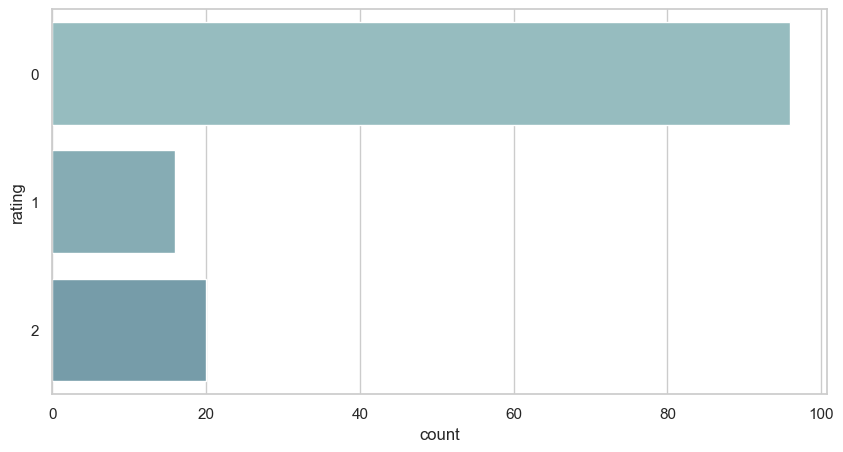

In [147]:
sns.countplot(y = df_water.rating, palette=pal ) 

0 - позитивная оценка, 1- нейтральная, 2 - негативная

### Итого выявлено, что вода не всегда является негативным фактором, построю Unigram и Bigram для изучения в связи c чем

In [130]:
dfNegReviews_water = df_water[df_water["rating"] == 2]
dfPosReviews_water = df_water[df_water["rating"] == 0]

### В позитивных отзывах

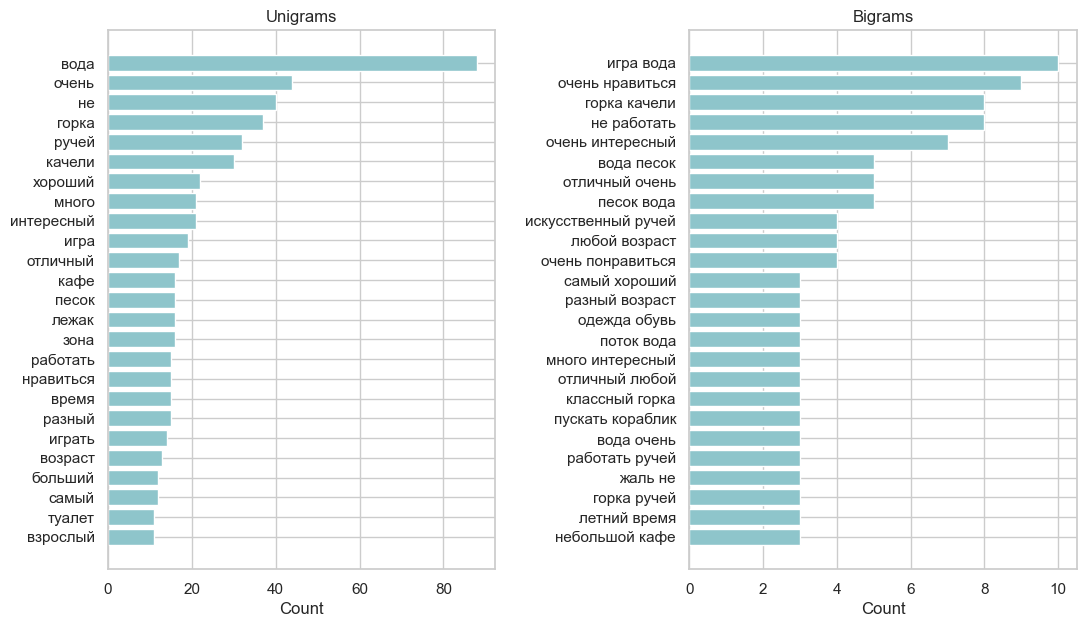

In [131]:
plot_poz_Ngrams(dfPosReviews_water['lemmatized_clean'])

### В негативных отзывах

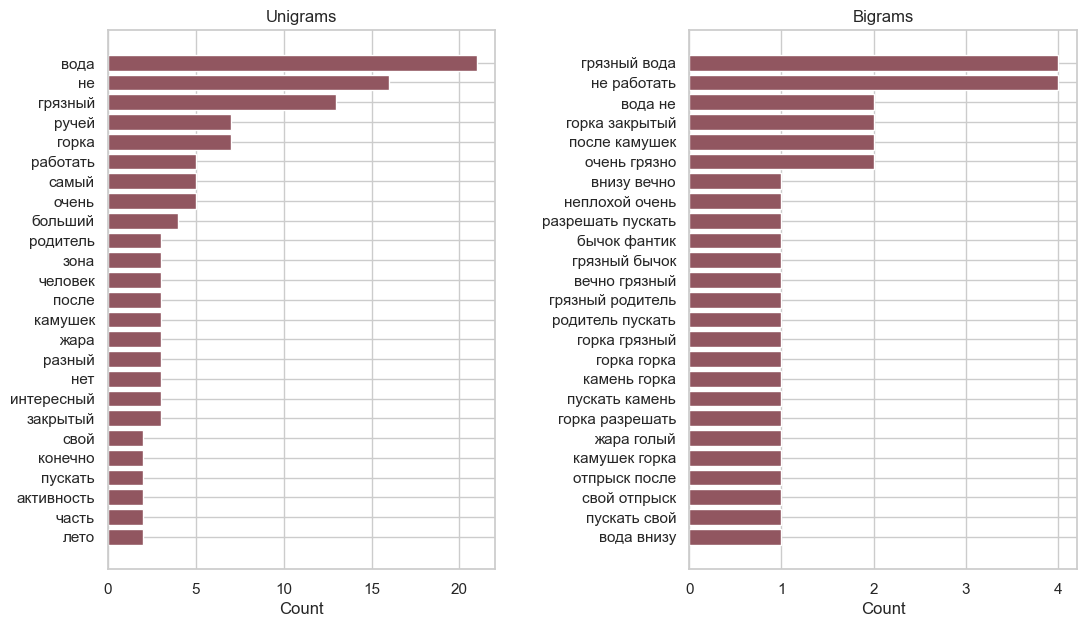

In [132]:
plot_neg_Ngrams(dfNegReviews_water['lemmatized_clean'])

#### Что самое грязное на площадках

In [48]:
df_dirty = df[df["lemmatized"].str.contains("грязный", regex=False)].reset_index(drop = True)
df_dirty

,name,gender,comment,rating,date,location,resource,lemmatized,lemmatized_clean
0,Layzend 1,Nan,На самом деле увидев данную площадку первое во...,1,2021,Бунинские луга. Пирамиды,google,дело увидеть данный первый возникаюнуть ассоци...,дело увидеть данный первый возникаюнуть ассоци...
1,Tanyshas Tanyshas,Nan,"Площадка интересная, необычная, чистая. В эко-...",0,2019,Бунинские луга. Пирамиды,google,интересный необычный чистый стиль дерево метал...,интересный необычный чистый стиль дерево метал...
2,Мария Мешалкина,female,"Площадка детям нравится. Но, вот покрытие тихи...",0,2019,Бунинские луга. Пирамиды,google,нравиться покрытие тихий ужас одежда грязный м...,нравиться покрытие тихий ужас одежда грязный м...
3,Tatiana Solomennikova,female,"Необычная площадка. Главное, что у детей восто...",0,2019,Бунинские луга. Пирамиды,google,необычный главное восторг туалет правда грязный,необычный главное восторг туалет правда грязный
4,Bestpodguznik ru,male,"О, эта площадка нравится всегда, только вот де...",1,2018,Бунинские луга. Пирамиды,google,этот нравиться приходить ооооочень грязный маш...,этот нравиться приходить ооооочень грязный маш...
5,MarderoWTF,Nan,Отличная площадка! Но эта белая щебёнка превра...,0,2019,Бунинские луга. Пирамиды,google,отличный этот белый превращать одежда обувь бе...,отличный этот белый превращать одежда обувь бе...
6,Pablo Eskabaro,male,Всё классно! Только ужасно грязный туалет и пе...,0,2019,Бунинские луга. Пирамиды,google,классно ужасно грязный туалет перебор галька в...,классно ужасно грязный туалет перебор галька в...
7,Павел Петрунин,male,"Туалет очень грязный, площадка уже совсем не н...",0,2018,Бунинские луга. Пирамиды,google,туалет очень грязный новый,туалет очень грязный не новый
8,Matluba Khojaeva,male,Грязное вода для детей,2,2021,Бунинские луга. Пирамиды,google,грязный вода,грязный вода
9,Вадим Калмыков,male,"Детям очень понравилось. Излазили все, что тол...",0,2022,Парк Горького. Салют,yandex,очень понравиться излазить счастливый грязный ...,очень понравиться излазить счастливый грязный ...


<AxesSubplot:xlabel='count', ylabel='rating'>

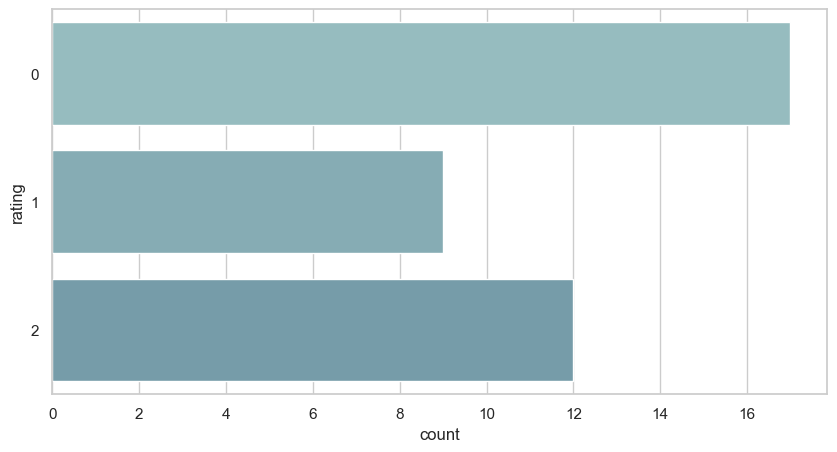

In [231]:
sns.countplot(y = df_dirty.rating, palette=pal ) 

In [146]:
dfNegReviews_dirty = df_dirty[df_dirty["rating"] == 2]
dfPosReviews_dirty = df_dirty[df_dirty["rating"] == 0]

### В позитивных отзывах

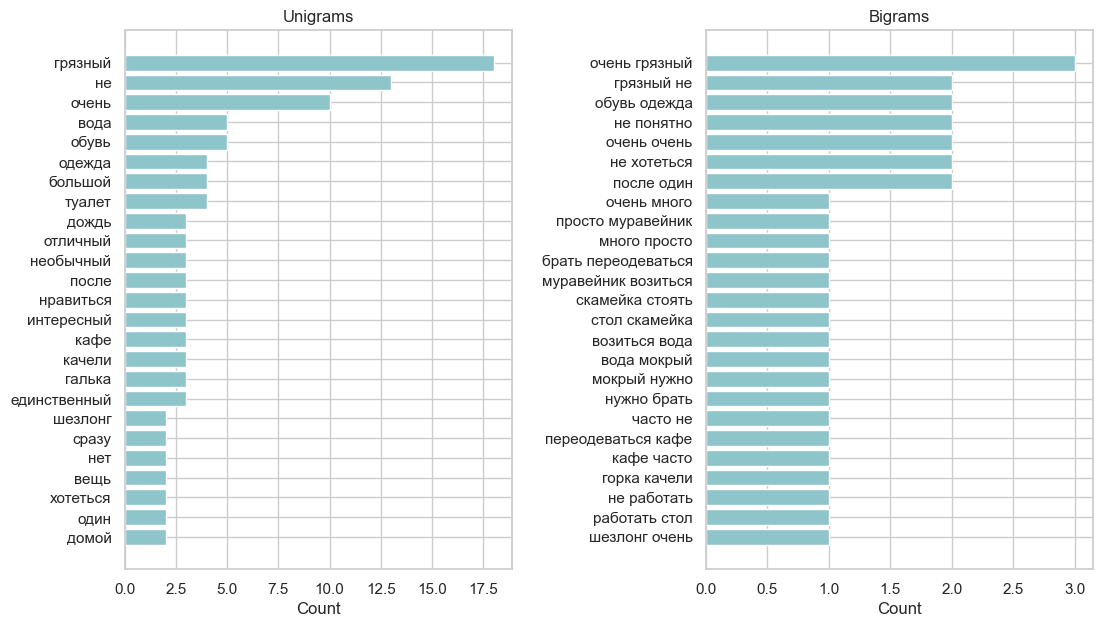

In [147]:
plot_poz_Ngrams(dfPosReviews_dirty['lemmatized_clean'])

### В негативных отзывах

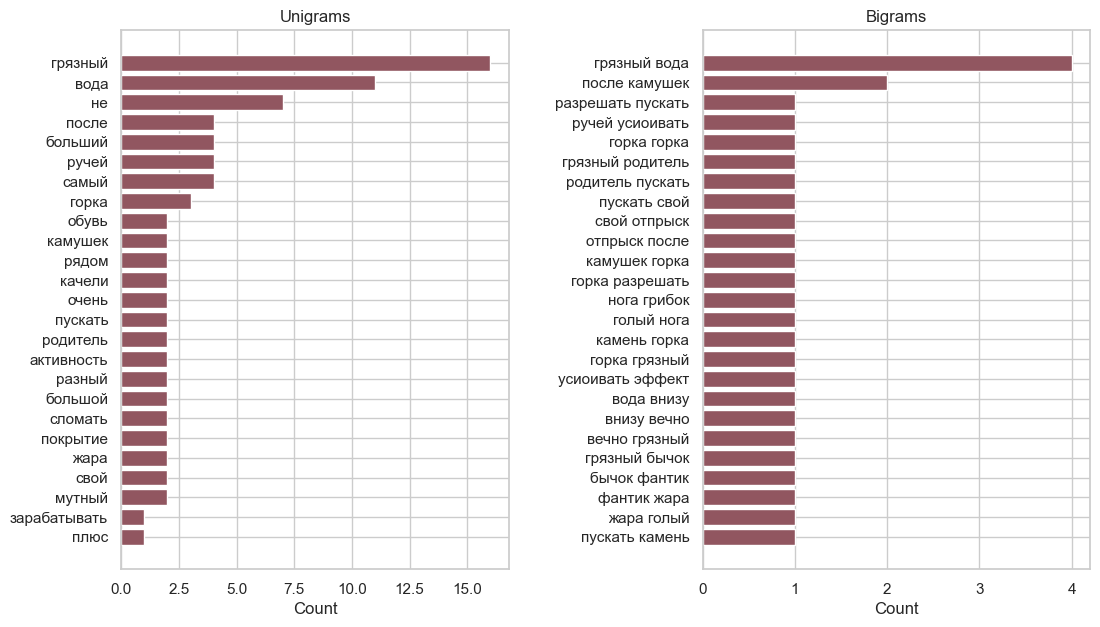

In [148]:
plot_neg_Ngrams(dfNegReviews_dirty['lemmatized_clean'])

In [50]:
df2 = df.copy()

#### Сыпучие покрытия

In [51]:
df2['lemmatized_s_loose'] = df2['lemmatized_clean'].replace(['галька', 'камушек', 'песок', 'известняк', 'камни', 'камень'], 'сыпучее покрытие')
df2['lemmatized_s_loose']

0                главное нравиться лето народ очень много
1                                      здесь очень весело
2       очень классный очень весело особенно понравить...
3       замечательный комплекс много качели любой вкус...
4                                           отличный игра
                              ...                        
1229                                           интересный
1230    очень хороший очень нравиться горка мельница и...
1231                                 готовый эмигрировать
1232    шикарный вода часами мочь пускать кораблик есл...
1233                                       хороший площка
Name: lemmatized_s_loose, Length: 1234, dtype: object

In [141]:
df_loose = df2[df2['lemmatized_s_loose'].str.contains("покрытие", regex=False)].reset_index(drop = True)
df_loose

,name,gender,comment,rating,date,location,resource,lemmatized,lemmatized_clean,lemmatized_s_loose
0,Артур Ф,male,Детская площадка : половина резиновое покрытие...,0,2018,Бунинские луга. Пирамиды,google,"[детский, площадка, половина, резиновый, покры...",половина резиновый покрытие половина мелкий мо...,половина резиновый покрытие половина мелкий мо...
1,Chantyange,Nan,Очень необычные Атракционы для детей всех возр...,0,2019,Бунинские луга. Пирамиды,google,"[очень, необычный, атракцион, ребёнок, возраст...",очень необычный атракцион возраст малыш пожалу...,очень необычный атракцион возраст малыш пожалу...
2,Мария Мешалкина,female,"Площадка детям нравится. Но, вот покрытие тихи...",0,2019,Бунинские луга. Пирамиды,google,"[площадка, ребёнок, нравиться, но, покрытие, т...",нравиться покрытие тихий ужас одежда грязный м...,нравиться покрытие тихий ужас одежда грязный м...
3,demanna /,Nan,"Большая площадка. Есть куча горок, качели, кар...",0,2019,Бунинские луга. Пирамиды,google,"[больший, площадка, есть, куча, горка, качели,...",больший куча горка качели карусель магазинчик ...,больший куча горка качели карусель магазинчик ...
4,Светлана Иванова,female,"Площадка клевая, но очень не нравится галька в...",0,2019,Бунинские луга. Пирамиды,google,"[площадка, клёвый, очень, не, нравиться, гальк...",клёвый очень не нравиться галька качество покр...,клёвый очень не нравиться галька качество покр...
5,TikTok и Likee,Nan,"Оригинальная площадка, дочке очень нравится, ...",0,2020,Бунинские луга. Пирамиды,google,"[оригинальный, площадка, дочка, очень, нравить...",оригинальный дочка очень нравиться минус камен...,оригинальный дочка очень нравиться минус камен...
6,Лена Солоницына,female,Покрытие камушками придумал какой то странный ...,1,2019,Бунинские луга. Пирамиды,google,"[покрытие, камушек, придумать, странный, челов...",покрытие камушек придумать странный человек по...,покрытие камушек придумать странный человек по...
7,Anna Ligay,female,Площадка интересная для ребятни. Много активно...,0,2018,Бунинские луга. Пирамиды,google,"[площадка, интересный, ребятня, много, активно...",интересный ребятня много активность впечатлени...,интересный ребятня много активность впечатлени...
8,Allo Allo,Nan,"Задумка, дизайн- классно, но покрытие площадки...",1,2021,Бунинские луга. Пирамиды,google,"[задумка, дизайн, классно, покрытие, площадка,...",задумка дизайн классно покрытие цементный пыль...,задумка дизайн классно покрытие цементный пыль...
9,Михаил Е,male,У пик в благоустройстве перебор с галька-песок...,0,2018,Бунинские луга. Пирамиды,google,"[у, пик, благоустройство, перебор, галька, пес...",благоустройство перебор галька песок щепа покр...,благоустройство перебор галька песок щепа покр...


<AxesSubplot:xlabel='count', ylabel='rating'>

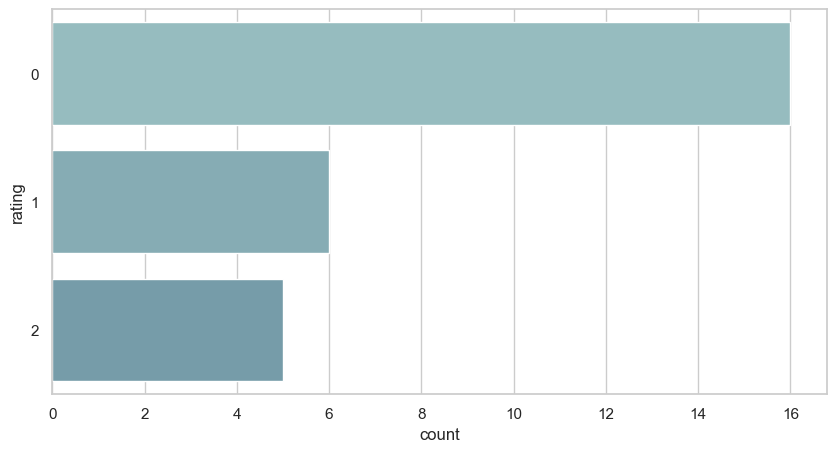

In [232]:
sns.countplot(y = df_loose.rating, palette=pal ) 

In [142]:
dfNegReviews_loose = df_loose[df_loose["rating"] == 2]
dfPosReviews_loose = df_loose[df_loose["rating"] == 0]

### В позитивных отзывах

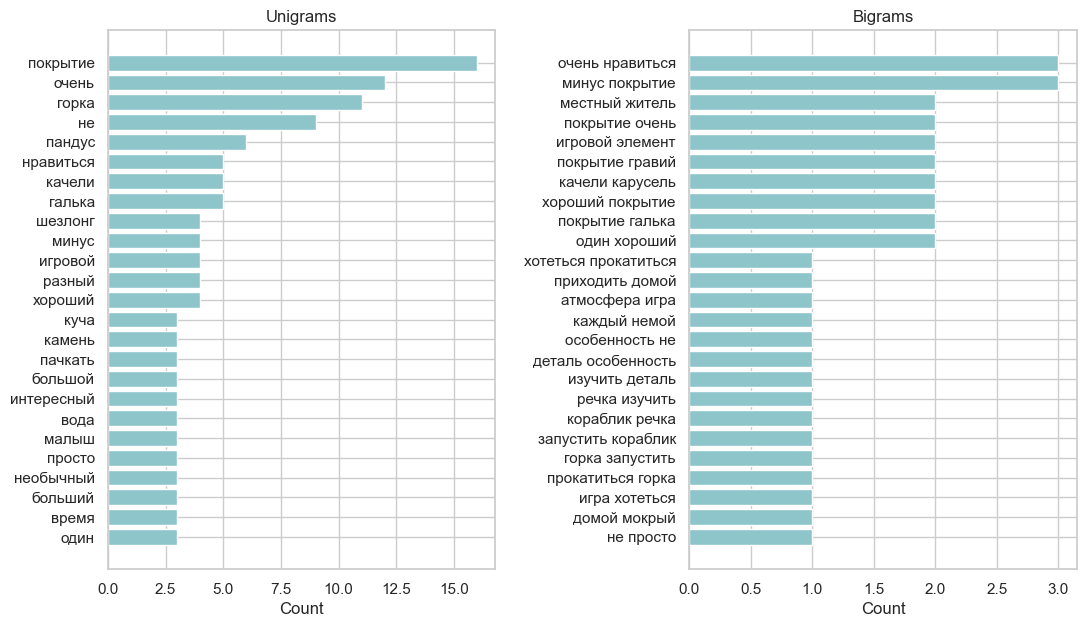

In [143]:
plot_poz_Ngrams(dfPosReviews_loose['lemmatized_s_loose'])

### В негативных отзывах

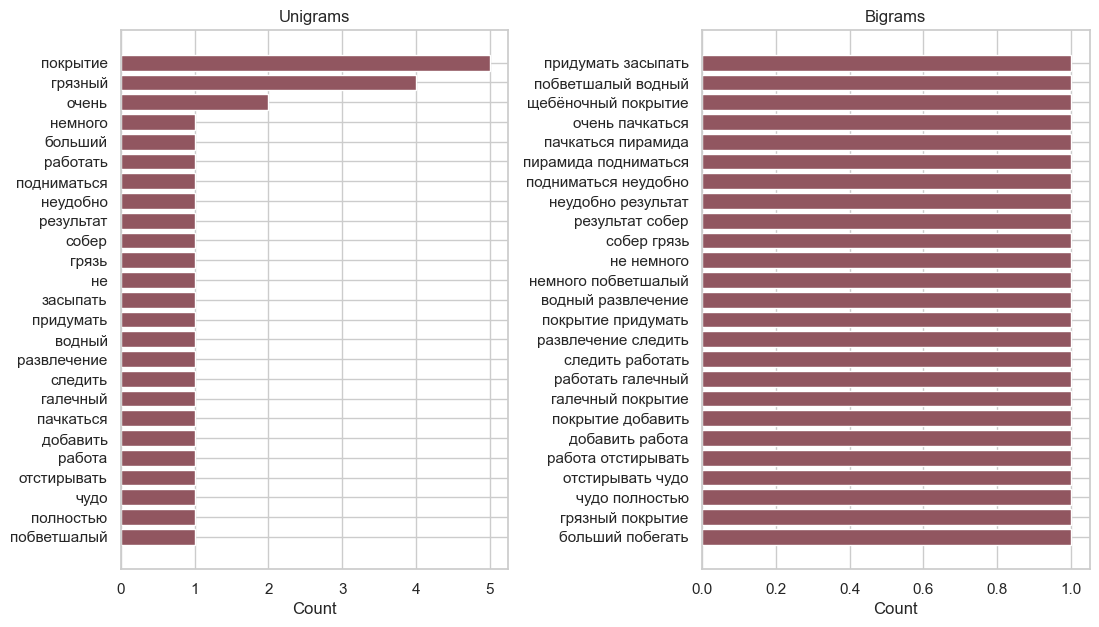

In [144]:
plot_neg_Ngrams(dfNegReviews_loose['lemmatized_s_loose'])

#### Опасность\безопасность

In [150]:
df_dang = df2[df2['lemmatized_s_loose'].str.contains("опасно", regex=False)].reset_index(drop = True)
df_dang

,name,gender,comment,rating,date,location,resource,lemmatized,lemmatized_clean,lemmatized_s_loose
0,Dorothy C. Rotich,female,Немного опасно,0,2021,Парк Горького. Салют,google,"[немного, опасно]",немного опасно,немного опасно
1,Мария Мешалкина,female,"Площадка детям нравится. Но, вот покрытие тихи...",0,2019,Бунинские луга. Пирамиды,google,"[площадка, ребёнок, нравиться, но, покрытие, т...",нравиться покрытие тихий ужас одежда грязный м...,нравиться покрытие тихий ужас одежда грязный м...
2,Григорий Горюнов,male,"Современно, функционально, безопасно, надёжно!",0,2020,Бунинские луга. Пирамиды,google,"[современно, функционально, безопасно, жно]",современно функционально безопасно,современно функционально безопасно
3,gamover47,Nan,"Странная сетка на мосту, какой нибудь вандал п...",2,2022,Парк Горького. Салют,youtube,"[странный, сетка, мост, вандал, прид, так, про...",странный сетка мост вандал прид прорезать пров...,странный сетка мост вандал прид прорезать пров...
4,Наталья Румянцева,female,"Супер площадка, все очень продумано для детей ...",0,2022,Парк Горького. Салют,yandex,"[супер, площадка, очень, продумать, ребёнок, б...",супер очень продумать безопасно приходить неск...,супер очень продумать безопасно приходить неск...
5,Алексей Лосев,male,"Интересные карусели, разнообразные качели, гор...",0,2022,Парк Горького. Салют,yandex,"[интересный, карусель, разнообразный, качели, ...",интересный карусель разнообразный качели горка...,интересный карусель разнообразный качели горка...
6,Надежда М.,female,Площадка прелесть!! И для лялечек маленьких ин...,0,2022,Бунинские луга. Пирамиды,yandex,"[площадка, прелесть, и, лялечек, маленький, ин...",прелесть лялечек маленький интересно подросток...,прелесть лялечек маленький интересно подросток...
7,Я Я,Nan,"Бегают крысы,вода на площадке грязная и вонь н...",0,2022,Бунинские луга. Пирамиды,yandex,"[бегать, крыса, вода, площадка, грязный, вонь,...",бегать крыса вода грязный вонь сломать опасно,бегать крыса вода грязный вонь сломать опасно
8,Антон Торопов,male,"Когда то, эта площадка была одной из визитных ...",2,2022,Бунинские луга. Пирамиды,yandex,"[когда, этот, площадка, один, визитный, карточ...",когда этот один визитный карточка бунинский по...,когда этот один визитный карточка бунинский по...
9,Vadim S.,male,"Интересный дизайн площадки, в скандинавском ст...",0,2022,Бунинские луга. Пирамиды,yandex,"[интересный, дизайн, площадка, скандинавский, ...",интересный дизайн скандинавский стиль достаточ...,интересный дизайн скандинавский стиль достаточ...


<AxesSubplot:xlabel='count', ylabel='rating'>

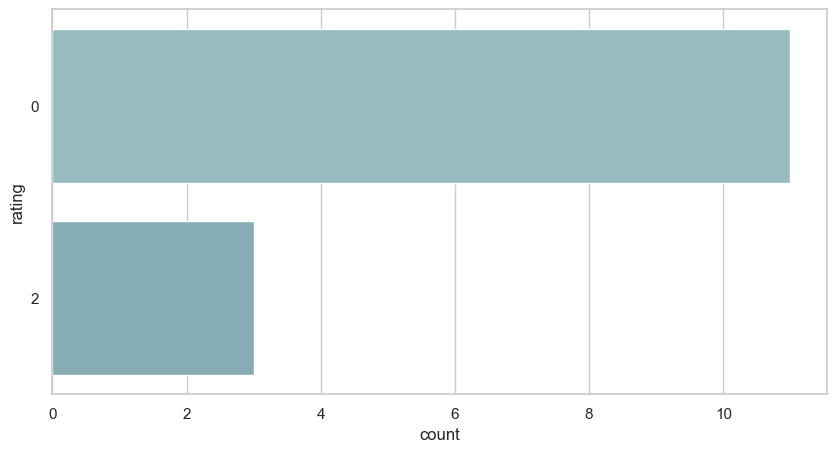

In [233]:
sns.countplot(y = df_dang.rating, palette=pal ) 

In [151]:
dfNegReviews_dang = df_dang[df_dang["rating"] == 2]
dfPosReviews_dang = df_dang[df_dang["rating"] == 0]

### В позитивных и негативных отзывах

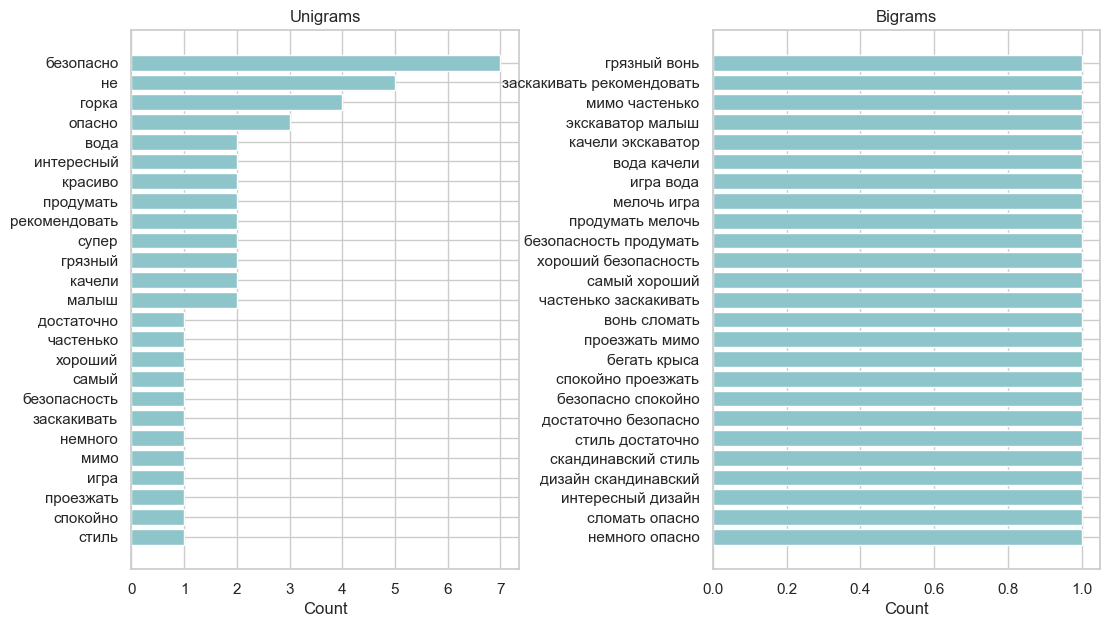

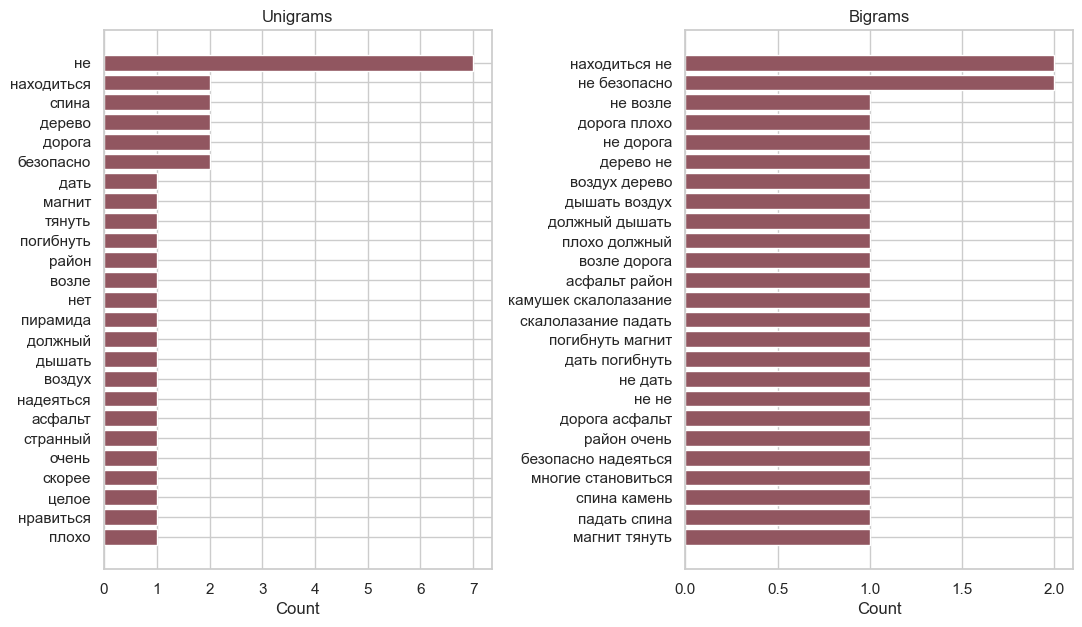

In [152]:
plot_poz_Ngrams(dfPosReviews_dang['lemmatized_s_loose'])
plot_neg_Ngrams(dfNegReviews_dang['lemmatized_s_loose'])

## Корреляции

Основные результаты корреляции называются коэффициентом корреляции (или “r”). Он находится в диапазоне от -1.0 до +1.0. Чем ближе r к +1 или -1, тем ближе 2 переменные связаны между собой.

Если r находится на грани 0, это означает, что между переменными нет никакой связи. Если r положительна, значит вместе переменная становится больше, а противоположная – больше. Если r отрицательна, это значит, что вместе она становится больше, а наоборот – меньше (часто называют “обратной” корреляцией).

В Машинном обучении принято рассматривать пять типов такой взаимозависимости – r (коэффициент корреляции Пирсона), p (к. к. Спирмана), τ ("тау", к. к. Кендалла), φk ("фи-ка", к. фи-корреляции), φc ("фи-Крамер", к. к. Крамера).

Чем ярче ячейка, тем сильнее выражена корреляция. Диагональные ячейки игнорируются, поскольку являются результатом расчета коэффициента между переменной и ее копией.

In [52]:
df3 = df2.copy()
def genger_to_bin(x):
    if x == 'male':
        return 1
    elif x == 'female':
        return 0
    else:
        pass

In [53]:
df3['gender'] = df3['gender']. apply(genger_to_bin)


In [54]:
def year(x):
    if x == 'Парк Горького. Салют':
        return 2018
    elif x == 'Бунинские луга. Пирамиды':
        return 2017
    

In [55]:
df3['year_of_construction'] = df3['location'].apply(year)
df3['year_diff'] = df3['date'] - df3['year_of_construction'] 

In [56]:
df3

,name,gender,comment,rating,date,location,resource,lemmatized,lemmatized_clean,lemmatized_s_loose,year_of_construction,year_diff
0,Дмитрий,1.0,"Главное, ребёнку нравится. Но летом народу оче...",0,2022,Парк Горького. Салют,google,главное нравиться лето народ очень много,главное нравиться лето народ очень много,главное нравиться лето народ очень много,2018,4
1,Михаил Лось,1.0,Здесь очень весело!),0,2022,Парк Горького. Салют,google,здесь очень весело,здесь очень весело,здесь очень весело,2018,4
2,Vika Andreeva,0.0,Очень классное место.Очень весело.Особенно пон...,0,2021,Парк Горького. Салют,google,очень классный очень весело особенно понравить...,очень классный очень весело особенно понравить...,очень классный очень весело особенно понравить...,2018,3
3,Светлана Рабинович,0.0,"Замечательный комплекс площадок, много качелей...",0,2021,Парк Горького. Салют,google,замечательный комплекс много качели любой вкус...,замечательный комплекс много качели любой вкус...,замечательный комплекс много качели любой вкус...,2018,3
4,Денис Пупыкин,1.0,Отличное место для игр с детьми))),0,2021,Парк Горького. Салют,google,отличный игра,отличный игра,отличный игра,2018,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1229,Рафаэль Т.,1.0,Интересная площадка для детей,0,2020,Бунинские луга. Пирамиды,yandex,интересный,интересный,интересный,2017,3
1230,Татьяна Б,0.0,Очень хорошая площадка! Нам очень нравится. Го...,0,2020,Бунинские луга. Пирамиды,yandex,очень хороший очень нравиться горка мельница и...,очень хороший очень нравиться горка мельница и...,очень хороший очень нравиться горка мельница и...,2017,3
1231,Ольга Кузнецова,0.0,Мой ребенок готов сюда эмигрировать.,0,2020,Бунинские луга. Пирамиды,yandex,готовый эмигрировать,готовый эмигрировать,готовый эмигрировать,2017,3
1232,Иван,1.0,Шикарная площадка с водой. Дети часами могут п...,0,2020,Бунинские луга. Пирамиды,yandex,шикарный вода часами мочь пускать кораблик есл...,шикарный вода часами мочь пускать кораблик есл...,шикарный вода часами мочь пускать кораблик есл...,2017,3


In [242]:
corr = df3.corr()
corr.style.background_gradient()
 # матрица корреляций числовых значений

,gender,rating,date,year_of_construction,year_diff
gender,1.000000,0.023874,-0.065923,0.000462,-0.063866
rating,0.023874,1.000000,0.072589,0.082187,0.041526
date,-0.065923,0.072589,1.000000,0.000179,0.944376
year_of_construction,0.000462,0.082187,0.000179,1.000000,-0.328698
year_diff,-0.063866,0.041526,0.944376,-0.328698,1.000000


### Корреляций нет

## Итог

### Вода всегда плохо?

In [111]:
df_water['rating'].value_counts() #0 - положительная оценка, 1- нейтральная, 2- отрицательная

0    96
2    20
1    16
Name: rating, dtype: int64

Нет. Среди 100 отзывов встречаются упоминания воды в положительном ключе, и только в 16 отзывах из 1234 в негативном, среди них выделяются те, где вода в связи с эксплуатацией стала грязной(4), также те что обозначили, что вода не работает(4)

### Сыпучее покрытие = грязь?

In [134]:
df_loose['rating'].value_counts() #0 - положительная оценка, 1- нейтральная, 2- отрицательная

0    16
1     6
2     5
Name: rating, dtype: int64

Нет. Только в 5 отзывах упоминается покрытие с негативным характером, еще для 6 является фактором склоняющим от позитивного

In [ ]:
В отзывах чаще всего грязным является вода(4), потом покрытие(3), потом общая замусоренность площадки

### Оборудование опасно для использования?

In [149]:
df_dang['rating'].value_counts() #0 - положительная оценка, 1- нейтральная, 2- отрицательная

0    11
2     3
Name: rating, dtype: int64

Нет. Самым частым фактором за опасность выступает близкая дорога (Бунинские луга), но большая часть упоминает безопасность площадок в целом 